# Unsupervised Learning Project

## Problem Statement

HELP International is a global humanitarian NGO dedicated to combating poverty and providing essential aid during disasters and natural calamities. The organization has recently raised $10 million and now seeks to allocate these funds strategically and effectively.

To achieve this, HELP International aims to identify countries in the most critical need of support by analyzing socio-economic and health-related indicators. Using data-driven approaches, countries will be grouped into clusters based on these indicators, helping to prioritize aid distribution. This constitutes a classic **unsupervised learning** problem where we cluster entities (countries) based on multiple features without predefined labels.

## Aim

- To cluster countries based on various numerical socio-economic and health indicators.
- To apply unsupervised learning techniques to identify patterns and group similar countries.
- To assist HELP International in making informed funding decisions based on the clustering results.

## Dataset Description

The dataset includes the following attributes:

- **country**: Name of the country  
- **child_mort**: Child mortality – deaths of children under 5 years per 1000 live births  
- **exports**: Exports as a percentage of GDP  
- **health**: Total health spending as a percentage of GDP  
- **imports**: Imports as a percentage of GDP  
- **income**: Net income per person  
- **inflation**: Annual GDP growth rate  
- **life_expec**: Life expectancy at birth  
- **total_fer**: Total fertility rate (children per woman)  
- **gdpp**: GDP per capita

## Notebook Structure

1. **Dataset Information**  
   - Overview of the dataset and its attributes.

2. **Exploratory Data Analysis (EDA) and Feature Engineering**  
   - Distribution plots and statistical summaries  
   - Correlation analysis  
   - Detection and treatment of outliers and missing values
   - Feature selection and transformation  
   - Scaling and normalization
    
3. **Summary of EDA**  
   - Key insights and findings from the data exploration phase.

4. **Modeling**  
   - Application of various clustering techniques (e.g., KMeans, Hierarchical Clustering, DBSCAN)  
   - Hyperparameter tuning and cluster evaluation

5. **Conclusion**  
   - Interpretation of clustering results  
   - Recommendations for fund allocation

---

In [1]:
# Importing the dependencies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
data=pd.read_csv('Country-data.csv')
data_desc=pd.read_csv('data-dictionary.csv')

## 1 Dataset Inspection

In [3]:
data.keys()

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [4]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [5]:
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## 2 Exploratory Data Analysis (EDA)

In this section, I’ll explore the dataset to get a clearer understanding of the countries and their development indicators. The goal is to uncover patterns, detect any issues in the data, and prepare it for modeling.

The main steps I’ll cover are:

- Checking for missing values and duplicates
- Visualizing feature distributions to identify trends and outliers
- Group-wise analysis to compare countries based on GDP and child mortality
- Analyzing correlations between different features
- Creating new, more meaningful features through combinations
- Applying transformations where necessary to reduce skewness
- Standardizing the data for use in clustering models later on

This EDA phase will not only help with insights but also guide how I clean and prepare the data for clustering.

### 2.1 Checking for Missing Values & Duplicates

Before jumping into visualizations, I first checked the data for any missing values or duplicates. Thankfully, all columns are complete, and there are no duplicate rows — so I didn’t need to worry about data imputation or cleaning here.


In [7]:
print('Null values per column:\n')
print(data.isnull().sum())
print('\n')
print(f'No. of duplicates in the dataset: {data.duplicated().sum()}')

Null values per column:

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


No. of duplicates in the dataset: 0


### 2.2 Univariate Exploration

To get a better feel for the data, I visualized some key features (child_mort, gdpp) using parallel coordinates. This helped highlight countries with the highest or lowest values in:

- Child mortality
- Fertility rate
- Life expectancy
- Health expenditure
- GDP per capita
- Income
- Inflation
- Imports and exports

These charts made it easier to spot extremes and better understand the range and spread of each variable.

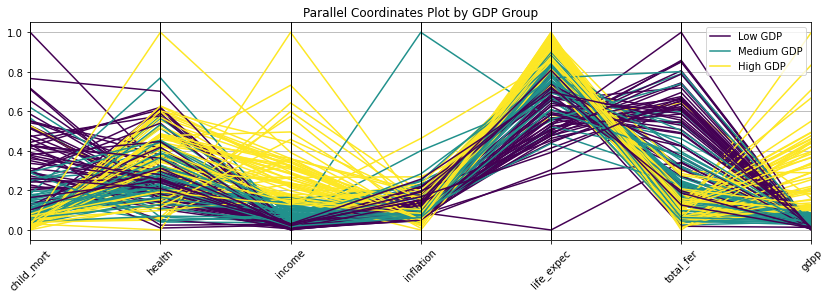

In [8]:

# Define features
features = ['child_mort', 'health', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Normalize feature values
data_normalized = data.copy()
data_normalized[features] = (data[features] - data[features].min()) / (data[features].max() - data[features].min())

# Bin GDP and convert to string
data_normalized['gdp_group'] = pd.cut(
    data['gdpp'],
    bins=[0, 2000, 10000, data['gdpp'].max()],
    labels=['Low GDP', 'Medium GDP', 'High GDP']
).astype(str)

# Subset to just numeric features + group label
plot_df = data_normalized[features + ['gdp_group']]

# Plot
plt.figure(figsize=(14, 4))
parallel_coordinates(plot_df, class_column='gdp_group', colormap='viridis')
plt.title('Parallel Coordinates Plot by GDP Group')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

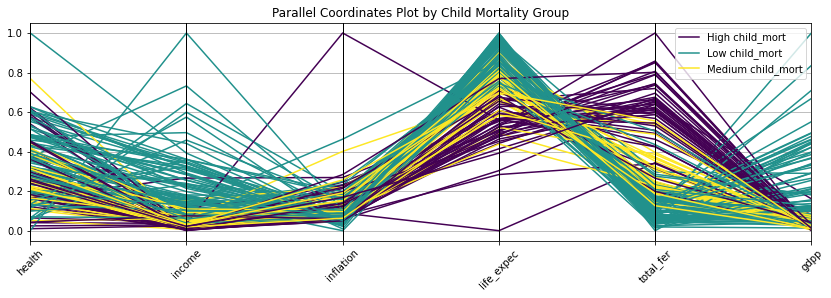

In [9]:
features = features = ['health', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Normalize features for better visualization
data_normalized = data.copy()
data_normalized[features] = (data[features] - data[features].min()) / (data[features].max() - data[features].min())

# Bin child_mort into 3 groups: Low, Medium, High
data_normalized['child_mort_group'] = pd.cut(
    data['child_mort'],
    bins=[0, 20, 60, data['child_mort'].max()],
    labels=['Low child_mort', 'Medium child_mort', 'High child_mort']
).astype(str)

# Prepare dataframe for plotting
plot_df = data_normalized[features + ['child_mort_group']]

# Plot
plt.figure(figsize=(14, 4))
parallel_coordinates(plot_df, class_column='child_mort_group', colormap='viridis')
plt.title('Parallel Coordinates Plot by Child Mortality Group')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2.3 Group-wise Visual Patterns

I wanted to see how feature distributions changed with certain conditions, so I grouped countries by GDP per capita and child mortality. Then I used parallel coordinates plots, which helped me compare how different features behave across these categories.

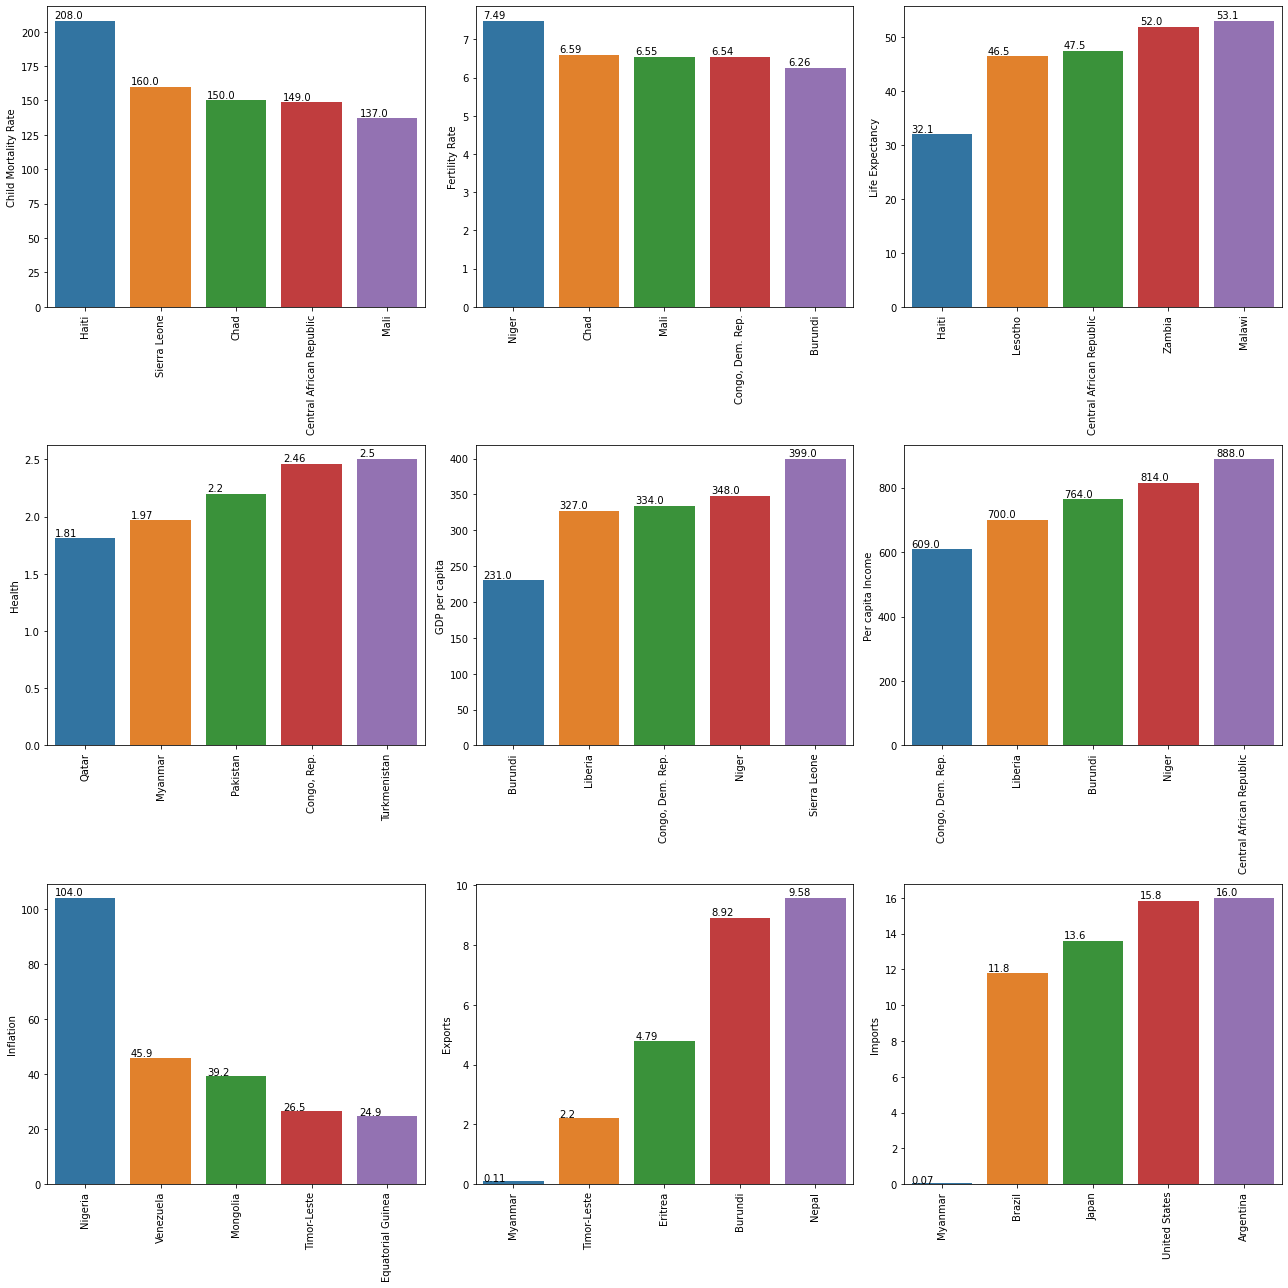

In [10]:
fig, axs = plt.subplots(3,3,figsize = (18,18))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top5_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top5_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head()
ax = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom5_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head()
ax = sns.barplot(x='country', y='life_expec', data= bottom5_life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom5_health = data[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data= bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom5_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data= bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom5_income = data[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data= bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top5_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data= top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom5_exports = data[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data= bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom5_imports = data[['country','imports']].sort_values('imports', ascending = True).head()
ax = sns.barplot(x='country', y='imports', data= bottom5_imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)    
plt.tight_layout()
plt.savefig('EDA')
plt.show()

### 2.4 Correlation Analysis

I also looked at how the features relate to one another. A heatmap and pairplot made it pretty clear that some features — like GDP and income — are highly correlated. This is useful to know for later, especially when deciding which features to keep or combine.

<AxesSubplot:>

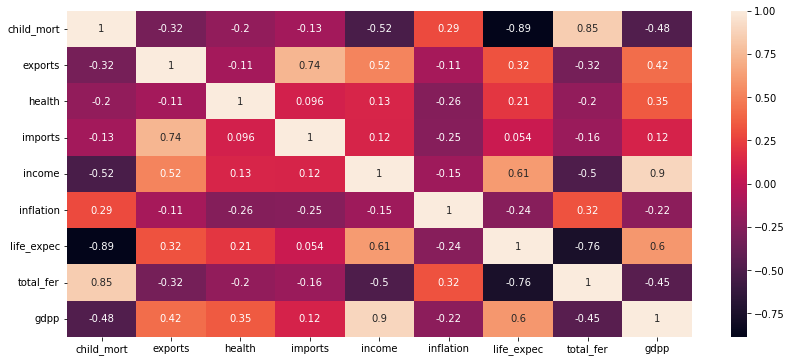

In [11]:
#do pairplot and correlation heatmap here
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True)

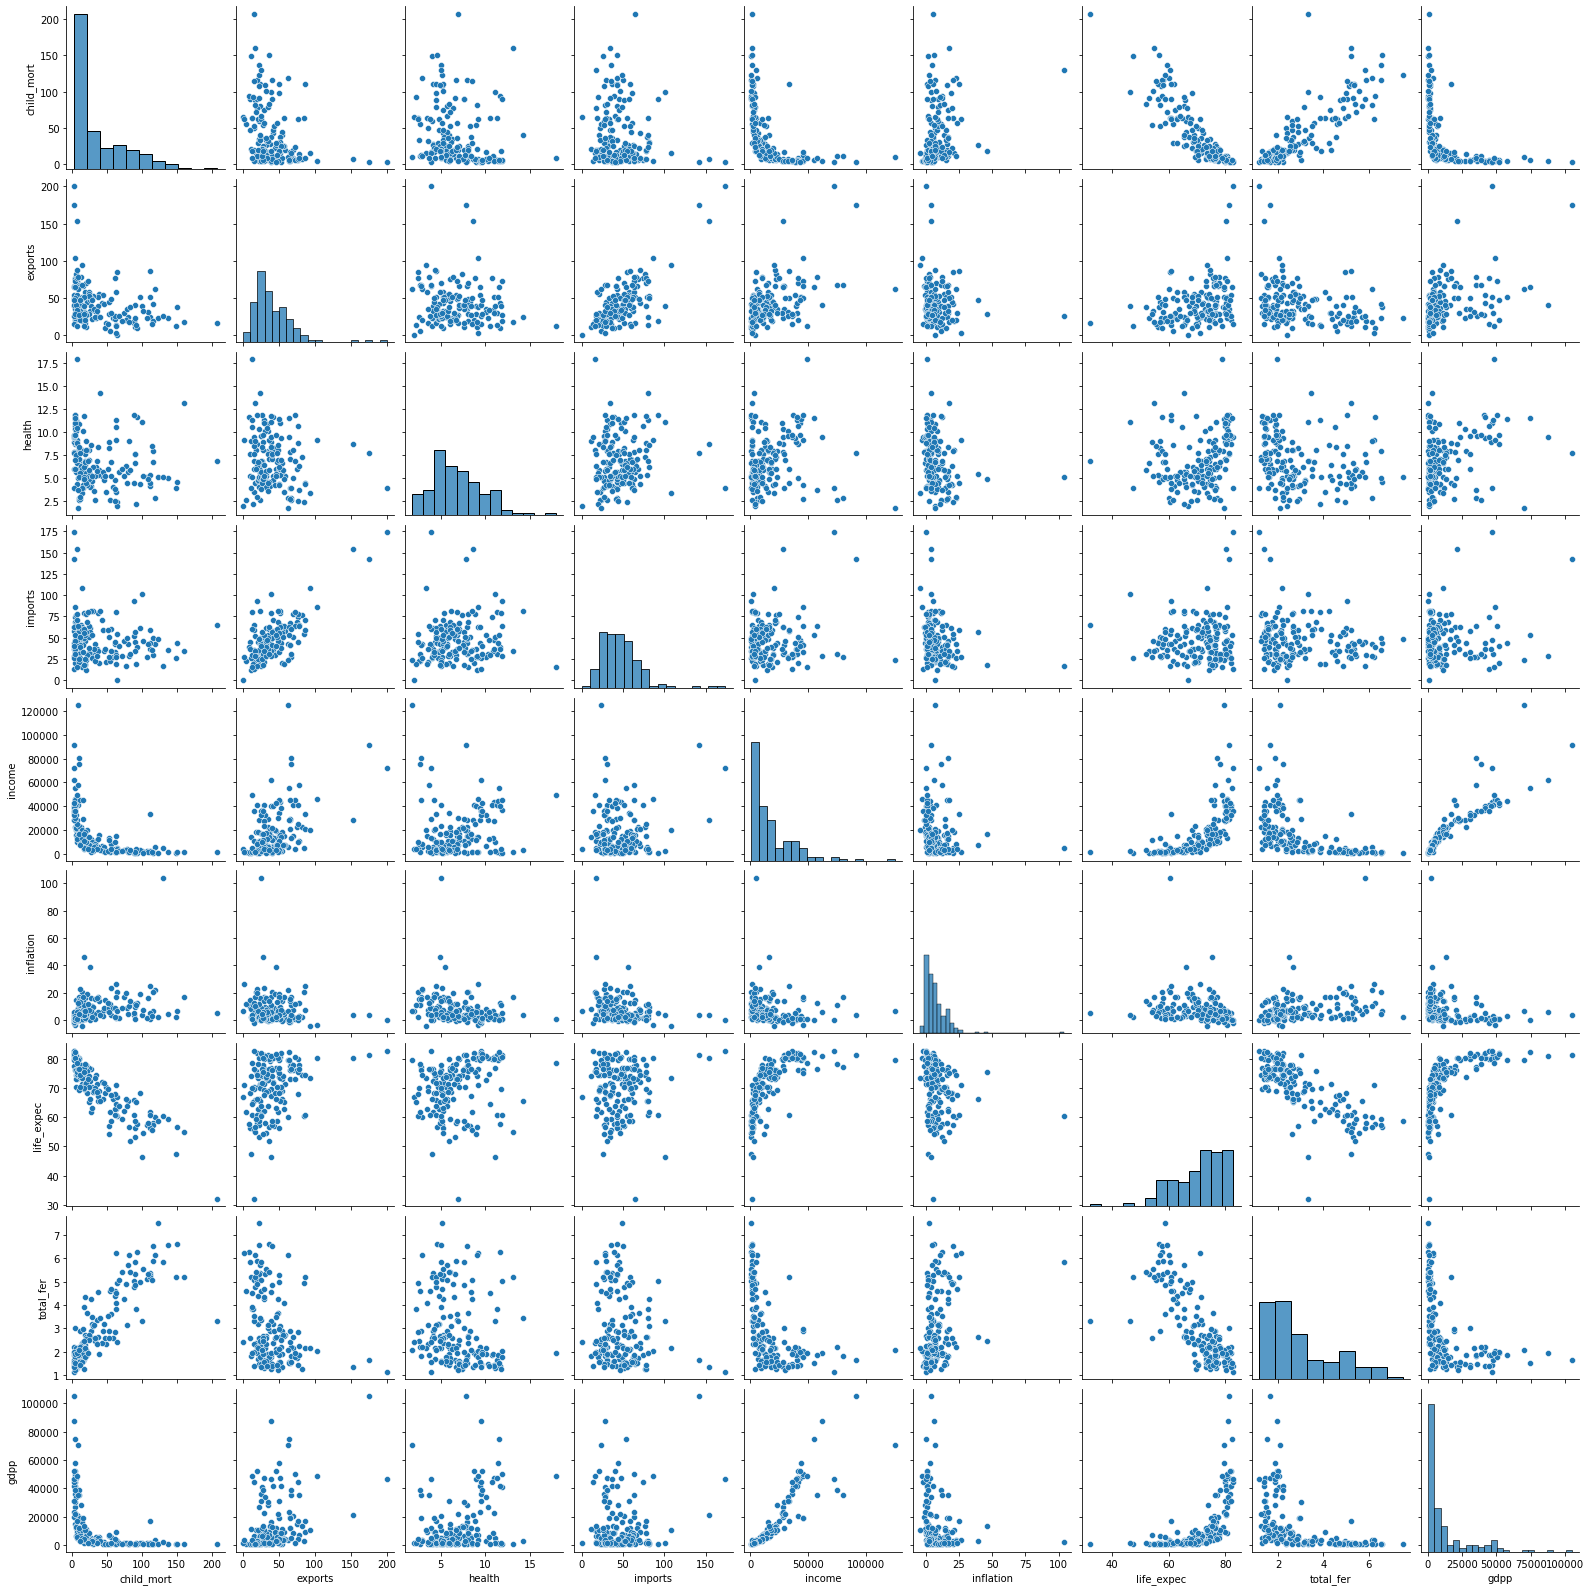

In [12]:
sns.pairplot(data)

### 2.5 Creating New Features

While exploring, I noticed some features show very high correlation and collinearity and could be combined to better represent certain concepts:

- `child_life_fert` combines child mortality, fertility rate, and life expectancy.
- `trade` combines imports and exports.
- `finance` is the sum of income and GDP per capita.

I created these to reduce redundancy and capture more holistic patterns.

In [13]:
data['child_life_fert']=data['child_mort']+data['total_fer']+data['life_expec']
data['trade']=data['imports']+data['exports']
data['finance']=data['gdpp']+data['income']
data1=data[['health', 'inflation', 'child_life_fert', 'trade', 'finance' ]]
data=data.drop(columns=['child_life_fert', 'trade', 'finance'])
data1.keys()

Index(['health', 'inflation', 'child_life_fert', 'trade', 'finance'], dtype='object')

### 2.6 Distribution of Engineered Features

To better understand the behavior of the newly created features, I plotted their distributions. This helps to identify skewness, outliers, or any unusual patterns that might affect the clustering results. Visualizing these distributions also guides the need for any further transformations.


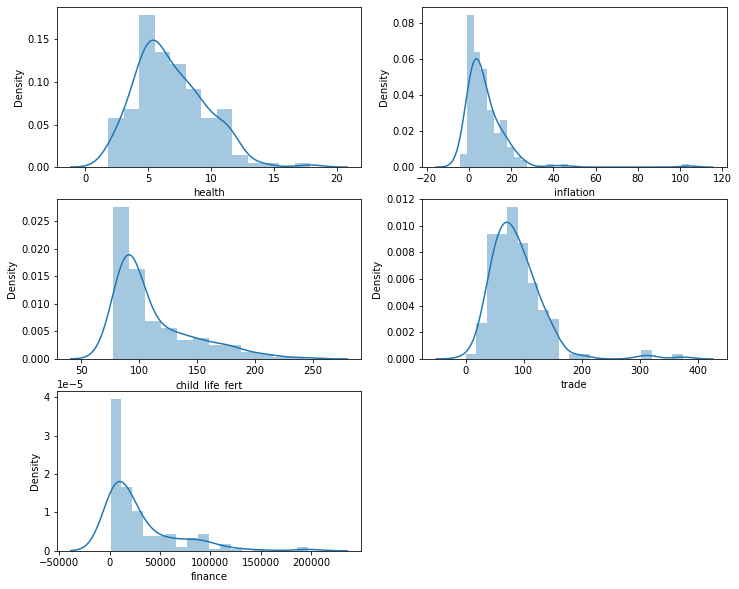

In [14]:
plt.figure(figsize=(12,10))

for i,key in enumerate(data1.keys()):
    plt.subplot(3,2,i+1)
    sns.distplot(data1[key])

### 2.7 Transformations

Since some of the new features had skewed distributions, I applied log transformations (with shifting where needed) to `child_life_fert`, `trade`, and `finance`. This helps to smooth things out and is especially useful when clustering later on.

In [15]:

data1 = data1.copy()

log_transform = ['child_life_fert', 'trade', 'finance']

for col in log_transform:
    if (data1[col] <= -1).any():
        shift = abs(data1[col].min()) + 1  # use data1 instead of data2
        data1[col] = np.log1p(data1[col] + shift)
    else:
        data1[col] = np.log1p(data1[col])

In [16]:
data1.isnull().sum()

health             0
inflation          0
child_life_fert    0
trade              0
finance            0
dtype: int64

### 2.8 Scaling Features

Since clustering algorithms like KMeans and Hierarchical Clustering are sensitive to the scale of the data, it’s important to bring all features to a common scale. Here, I use standard scaling to transform the features so that they have a mean of zero and a standard deviation of one. This helps the models treat each feature equally and improves clustering performance.

In [17]:

scale=StandardScaler()
data1_scaled=scale.fit_transform(data1)


## 3. Summary of EDA

From the exploratory data analysis, we gathered the following key insights:

- The dataset is clean with no missing or duplicate values.
- Countries show significant disparities in socio-economic and health indicators.
- GDP per capita, income, and health expenditure are closely linked with child mortality and life expectancy.
- Some features such as child mortality and fertility are inversely related to income and life expectancy.
- Strong correlation was observed between GDP and Income, which informed our decision to engineer a `finance` feature.
- Three new composite features (`child_life_fert`, `trade`, and `finance`) were created to capture essential variations and reduce redundancy.
- Log transformations helped in normalizing the distributions of highly skewed features.


## 4. Model Training and Clustering Analysis

This section documents the unsupervised learning process used to cluster countries based on socio-economic indicators, aiming to categorize them into three intuitive levels: *"Help Needed"*, *"Might Need Help"*, and *"No Help Needed"*. 

We began by applying **preprocessing and dimensionality reduction** before using multiple clustering algorithms. Evaluation was based on internal clustering metrics, and final results were mapped for interpretability.

---

### 🤖 Models Explored

#### 1. **K-Means Clustering**
- Partition-based method that assumes spherical clusters.
- Simple and interpretable.
- Evaluated for various values of `k`.

#### 2. **Agglomerative (Hierarchical) Clustering**
- Builds nested clusters through a bottom-up approach.
- Multiple linkage methods and distance metrics tested.

#### 3. **DBSCAN**
- Density-based approach for detecting clusters of varying shape.
- Tuned using distance threshold techniques.
- Suitable for handling noise and outliers.

---

### 🔧 Techniques Used

#### 1. **Principal Component Analysis (PCA)**
- Used to reduce the dataset's dimensionality and improve cluster separation and visualization.
- Retained the first 3 components for plotting and clustering.

#### 2. **Hyperparameter Tuning**
- Exhaustive tuning of parameters such as:
  - `k` in K-Means (via Elbow and Silhouette methods).
  - `n_clusters`, `linkage`, `affinity` in Agglomerative Clustering.
  - `eps`, `min_samples` in DBSCAN (via distance plots and trials).

#### 3. **Evaluation Metrics**
To evaluate the effectiveness of our clustering results, we use internal validation metrics that do **not require true labels**. These metrics assess how well the data is grouped based on intra-cluster cohesion and inter-cluster separation:

- **Silhouette Score (SC):**  
  Measures how similar a point is to its own cluster compared to other clusters.  
  - **Range:** -1 to 1  
  - **Interpretation:**  
    - `1`: Strong clustering structure  
    - `0`: Overlapping clusters  
    - `< 0`: Likely incorrect clustering

- **Calinski-Harabasz Index (CHI):**  
  Also called the **Variance Ratio Criterion**, this metric evaluates the ratio of between-cluster dispersion to within-cluster dispersion.  
  - **Interpretation:** Higher values indicate better-defined clusters.

- **Davies-Bouldin Index (DBI):**  
  Represents the average similarity between each cluster and its most similar one.  
  - **Interpretation:** Lower values indicate better clustering; values closer to **0** are ideal.

---

Further sections delve into evaluation, comparison, and final model selection.


### Dimensionality Reduction with PCA

Before applying clustering algorithms, we will use **Principal Component Analysis (PCA)** to reduce the dimensionality of our dataset. PCA transforms the original features into a new set of orthogonal components that capture the most variance in the data.

By projecting the data into **two principal components**, we achieve the following benefits:

- **Improved visualization**: Allows us to plot the data in a 2D space to better understand its structure.
- **Noise reduction**: Eliminates less important features, helping clustering algorithms focus on the most significant patterns.
- **Efficiency**: Reduces computational complexity, which is especially helpful for clustering on high-dimensional data.

This transformation will serve as the input for our clustering step.

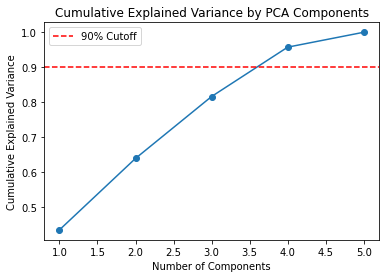

In [18]:

pca1 = PCA().fit(data1_scaled)
cumulative_variance = np.cumsum(pca1.explained_variance_ratio_)

# Plot cumulative explained variance

plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Cutoff')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.show()

As 3 clusters would be appropriate for my training I'll select n_components to be 3.

In [19]:
pca_result=PCA(n_components=3).fit_transform(data1_scaled)

### K-Means Clustering:

After applying PCA, we use **K-Means Clustering** to group countries into distinct clusters based on their socio-economic indicators.

K-Means works by:

- Randomly initializing `k` cluster centroids.
- Iteratively assigning data points to the nearest centroid.
- Updating the centroids based on the mean of the assigned points.
- Using evaluation metrics silhouette, calinski_harabasz, davies_bouldin, inertia.


In [20]:


results = []
# for loop for all k values
for n in [2, 3, 4, 5, 6, 7]:
    try:
        m = KMeans(n_clusters=n, n_init=10)
        labels = m.fit_predict(pca_result)

        silhouette = silhouette_score(pca_result, labels)
        ch_score = calinski_harabasz_score(pca_result, labels)
        db_score = davies_bouldin_score(pca_result, labels)
        inertia = m.inertia_
        results.append({
            'n_clusters': n,
            'inertia': inertia,
            'silhouette': silhouette,
            'calinski_harabasz': ch_score,
            'davies_bouldin': db_score,
            'labels': labels
            
        })

    except Exception as e:
        print(f"Skipped (n={n}): {e}")

# Convert results to DataFrame and display
results_df_k = pd.DataFrame(results)
results_df_k.sort_values(by='inertia', ascending=True, inplace=True)
results_df_k.reset_index(drop=True, inplace=True)
results_df_k

n_clusters     inertia  silhouette  calinski_harabasz  davies_bouldin  \
0           7  178.143143    0.286904          75.321978        1.082409   
1           6  195.285414    0.301907          80.140995        1.001833   
2           5  223.441843    0.316338          82.993107        1.041445   
3           4  268.969019    0.324478          83.297675        0.994277   
4           3  335.198490    0.305490          84.672519        1.162056   
5           2  423.720868    0.382825         100.311632        1.079474   

                                              labels  
0  [3, 1, 0, 4, 5, 0, 1, 2, 2, 0, 2, 5, 4, 2, 5, ...  
1  [2, 0, 4, 2, 5, 4, 0, 1, 1, 0, 1, 5, 2, 5, 4, ...  
2  [4, 0, 2, 4, 0, 2, 2, 3, 3, 2, 3, 0, 4, 3, 0, ...  
3  [1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 3, 0, 1, 3, 0, ...  
4  [2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, ...  
5  [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...

Visualizing Elbow and Silhoutte Score for various K values

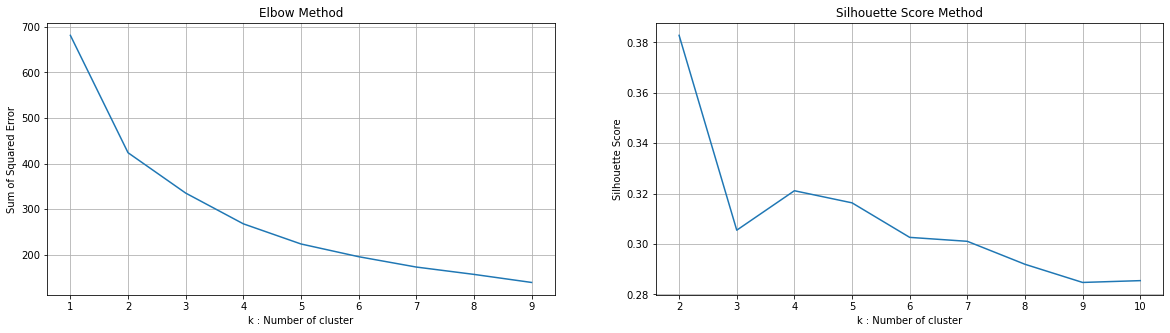

In [21]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
m1=pca_result
# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(m1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

For our analysis, we set the number of clusters to **k = 3**, aiming to categorize countries into three general groups (e.g., high, medium, and low development).

This step helps us uncover hidden groupings in the data and identify countries that may require focused attention based on their cluster assignment.m

The unique values of the clusters are:
2    69
1    53
0    45
Name: k_cluster, dtype: int64


<Figure size 720x432 with 0 Axes>

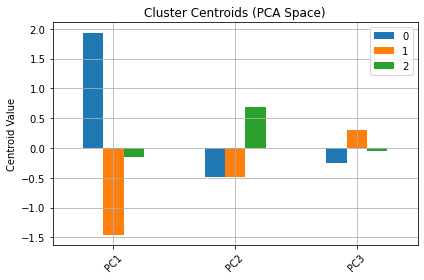

In [22]:
model = KMeans(n_clusters=3, n_init=10)
data['k_cluster'] = model.fit_predict(pca_result)
print('The unique values of the clusters are:')
print(data['k_cluster'].value_counts())

# Cluster centroids from KMeans (in PCA space)
centroids = model.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['PC1', 'PC2','PC3'])


# Plot the centroids
plt.figure(figsize=(10, 6))
centroid_df.T.plot(kind='bar', legend=True, title="Cluster Centroids (PCA Space)")
plt.ylabel("Centroid Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Child mortality and GDP per capita are strong indicators of a country's overall condition. Therefore, I visualize these features against the cluster labels to better interpret and classify each cluster based on how much external assistance the countries may require.

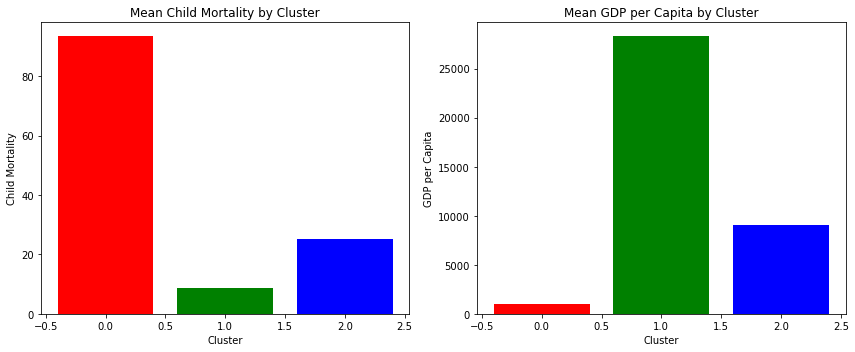

In [23]:
# Define consistent cluster colors
cluster_colors = ['red', 'green', 'blue']

# Compute mean values by cluster
grouped = data.groupby('k_cluster')[['child_mort', 'gdpp']].mean().reset_index()

# Set up side-by-side bar plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot child mortality
axs[0].bar(grouped['k_cluster'], grouped['child_mort'], color=cluster_colors)
axs[0].set_title('Mean Child Mortality by Cluster')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Child Mortality')

# Plot GDP per capita
axs[1].bar(grouped['k_cluster'], grouped['gdpp'], color=cluster_colors)
axs[1].set_title('Mean GDP per Capita by Cluster')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('GDP per Capita')

plt.tight_layout()
plt.show()

In [24]:
labels={}
for i in data['k_cluster'].value_counts().index:
    labels[i]=data[data['k_cluster']==i]['gdpp'].mean()
labels=sorted(labels.items(),key=lambda x:x[1])
labels=[i for i,j in labels]
# Update k_cluster to human-readable labels using .loc
data['Help_Status1'] = data['k_cluster'].map({
    labels[1]: 'Might Need Help',
    labels[2]: 'No Help Needed',
    labels[0]: 'Help Needed'
})

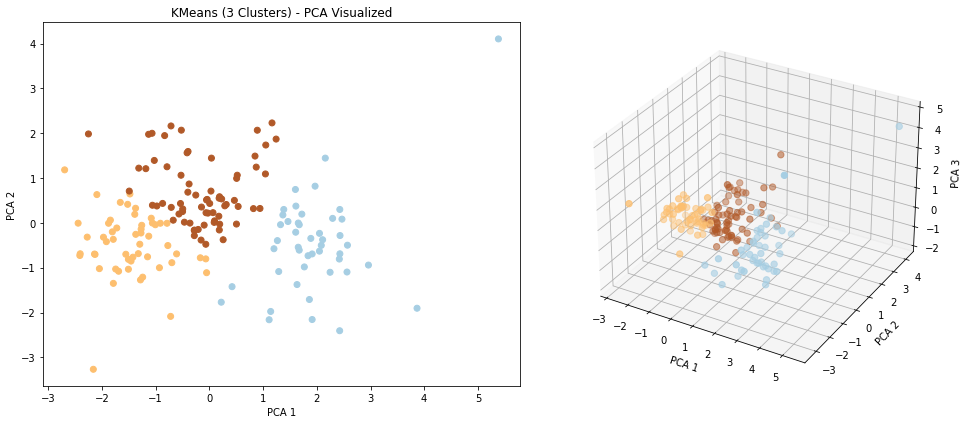

In [25]:
# PCA visualization

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(pca_result[:, 0], pca_result[:, 1], c=data['k_cluster'], cmap='Paired')
ax1.set_title("KMeans (3 Clusters) - PCA Visualized")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")

# 3D plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(pca_result[:, 0], pca_result[:, 1],pca_result[:, 2], c=data['k_cluster'], cmap='Paired', s=40)
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_zlabel("PCA 3")

plt.tight_layout()
plt.show()

The clustering above may not be further apart but they do appear somewhat separated. 

In [26]:

# Create choropleth map
fig = px.choropleth(
    data_frame = data,
    locationmode = 'country names',
    locations = 'country',
    title = 'Needed Help Per Country (World)',
    color = 'Help_Status1',
    color_discrete_map={
        'Help Needed': 'Red',
        'Might Need Help': 'Yellow',
        'No Help Needed': 'Green'
    }
)

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    legend_title_text='Labels',
    legend_title_side='top',
    title_pad_l=260,
    title_y=0.86
)

fig.show()

### Evaluating Clustering Performance

The map provides a clear visual distinction and appears to effectively categorize countries in a way that aligns with the general classification of first, second, and third world nations. However looking at the clustering evaluation scores, we can observe the following:

- The **Davies-Bouldin Index (DBI)** is not close to 0, indicating poor separation and compactness of clusters.
- The **Silhouette Coefficient (SC)** is closer to 0 than to 1, suggesting that the clusters overlap and are not well-defined.
- The **Calinski-Harabasz Index (CHI)** is not very high — for high-quality clustering, we would typically expect CHI values in the hundreds.

Overall, these scores (DBI, SC, and CHI) suggest that our current clustering is not very effective. Therefore, let us explore an alternative clustering method to see if we can achieve better-defined groups.

## Agglomerative Clustering¶

For Agglomerative Clustering (Hierarchical), we first want to determine where to cut the tree. We'll also need to iterate over different linkage and metric types to see which tree produces the best method. However, let us first use euclidean metric.

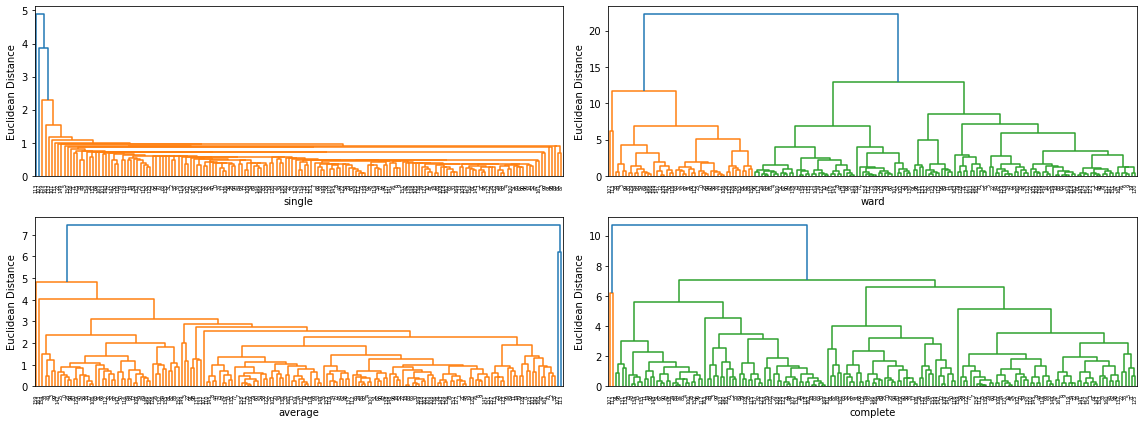

In [27]:

plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
linkage_data = linkage(pca_result, method = 'single', metric = 'euclidean')
dendrogram(linkage_data)
plt.xlabel("single")
plt.ylabel("Euclidean Distance")
plt.tight_layout()

plt.subplot(2,2,2)
linkage_data = linkage(pca_result, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.xlabel("ward")
plt.ylabel("Euclidean Distance")
plt.tight_layout()

plt.subplot(2,2,3)
linkage_data = linkage(pca_result, method = 'average', metric = 'euclidean')
dendrogram(linkage_data)
plt.xlabel("average")
plt.ylabel("Euclidean Distance")
plt.tight_layout()

plt.subplot(2,2,4)
linkage_data = linkage(pca_result, method = 'complete', metric = 'euclidean')
dendrogram(linkage_data)
plt.xlabel("complete")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()

We can see that complete and ward linkages provide more clear clusters so I'll be going ahead with those.

In [28]:


results = []

n_clusters_list = [2,3,4,5,6,7]
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['ward', 'complete']

for n in n_clusters_list:
    for linkage in linkages:
        for affinity in affinities:
            if linkage == 'ward' and affinity != 'euclidean':
                continue  # ward linkage only works with euclidean

            try:
                model = AgglomerativeClustering(
                    n_clusters=n,
                    linkage=linkage,
                    affinity=affinity  # <--- FIXED
                )
                labels = model.fit_predict(pca_result)

                silhouette = silhouette_score(pca_result, labels)
                ch_score = calinski_harabasz_score(pca_result, labels)
                db_score = davies_bouldin_score(pca_result, labels)

                results.append({
                    'n_clusters': n,
                    'linkage': linkage,
                    'affinity': affinity,
                    'silhouette': silhouette,
                    'calinski_harabasz': ch_score,
                    'davies_bouldin': db_score,
                    'labels': labels
                })

            except Exception as e:
                print(f"Skipped (n={n}, linkage={linkage}, affinity={affinity}): {e}")

# Only convert to DataFrame and sort if results exist
if results:
    results_df_agg = pd.DataFrame(results)
    results_df_agg.sort_values(by='silhouette', ascending=False, inplace=True)
    results_df_agg.reset_index(drop=True, inplace=True)
    display(results_df_agg.head(10))
else:
    print("No successful clustering results.")

n_clusters   linkage   affinity  silhouette  calinski_harabasz  \
0           2  complete  euclidean    0.665666          23.967634   
1           2  complete  manhattan    0.665666          23.967634   
2           2      ward  euclidean    0.402918          93.952114   
3           5      ward  euclidean    0.296895          71.303866   
4           3  complete  manhattan    0.295852          60.788458   
5           4      ward  euclidean    0.294419          76.423444   
6           6      ward  euclidean    0.284995          66.910166   
7           3      ward  euclidean    0.278788          77.226035   
8           7      ward  euclidean    0.265493          65.219266   
9           4  complete  manhattan    0.255388          57.081803   

   davies_bouldin                                             labels  
0        0.727685  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1        0.727685  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2        1.013789  [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...  
3        1.041464  [1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 4, 1, 2, 4, ...  
4        1.057247  [2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, ...  
5        1.081033  [1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 0, ...  
6        1.018095  [0, 3, 5, 0, 2, 3, 3, 2, 2, 3, 2, 4, 0, 2, 4, ...  
7        1.234553  [0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, ...  
8        1.095136  [2, 3, 5, 6, 0, 3, 3, 0, 0, 3, 0, 4, 6, 0, 4, ...  
9        1.013083  [0, 0, 0, 0, 3, 2, 0, 2, 2, 0, 2, 3, 0, 2, 3, ...

Complete linkage with Euclidean metric seems to give the best scores for unreliable labels. Comparitively Ward seems to perform better so I'm training the final Heirarchical model over that.

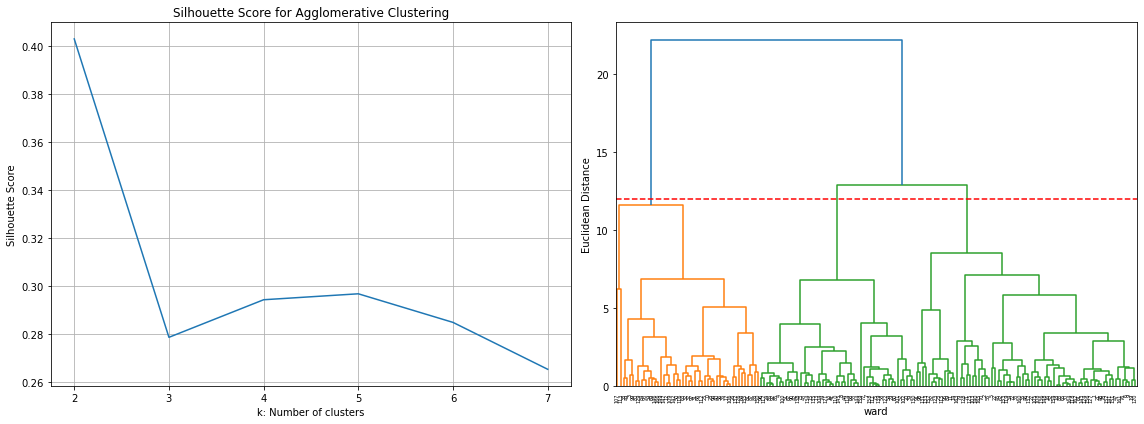

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.lineplot(results_df_agg[results_df_agg['linkage']=='ward']['n_clusters'], y=results_df_agg['silhouette'])
plt.title('Silhouette Score for Agglomerative Clustering')
plt.xlabel("k: Number of clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()


plt.subplot(1,2,2)
linkage_data = linkage(pca_result, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.xlabel("ward")
plt.ylabel("Euclidean Distance")
plt.axhline(y=12, color='r', linestyle='--')
plt.tight_layout()


plt.show()

Now, since n_clusters=3 give decent results and also fit the purpose of my project, I train the model for three clusters and check the unique values in each cluster along with how much the pca features to each cluster.

1    71
2    50
0    46
Name: agglo_cluster, dtype: int64


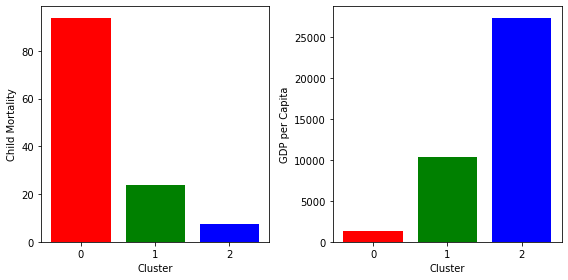

In [30]:
model = AgglomerativeClustering(
                    n_clusters=3,
                    linkage='ward',
                    affinity='euclidean'  # <--- FIXED
                )
data['agglo_cluster'] = model.fit_predict(pca_result)
print(data['agglo_cluster'].value_counts())


cluster_colors = ['red', 'green', 'blue']

# Compute mean values by cluster
grouped = data.groupby('agglo_cluster')[['child_mort', 'gdpp']].mean().reset_index()

# Plot
plt.figure(figsize=(8, 4))

# Child Mortality bar plot
plt.subplot(1, 2, 1)
plt.bar(grouped['agglo_cluster'], grouped['child_mort'], color=cluster_colors)
plt.xticks([0, 1, 2])
plt.xlabel('Cluster')
plt.ylabel('Child Mortality')

# GDP per Capita bar plot
plt.subplot(1, 2, 2)
plt.bar(grouped['agglo_cluster'], grouped['gdpp'], color=cluster_colors)
plt.xticks([0, 1, 2])
plt.xlabel('Cluster')
plt.ylabel('GDP per Capita')

plt.tight_layout()
plt.show()


In [31]:
labels={}
for i in data['agglo_cluster'].value_counts().index:
    labels[i]=data[data['agglo_cluster']==i]['gdpp'].mean()
labels=sorted(labels.items(),key=lambda x:x[1])
labels=[i for i,j in labels]
# Update k_cluster to human-readable labels using .loc
data['Help_Status2'] = data['agglo_cluster'].map({
    labels[1]: 'Might Need Help',
    labels[2]: 'No Help Needed',
    labels[0]: 'Help Needed'
})

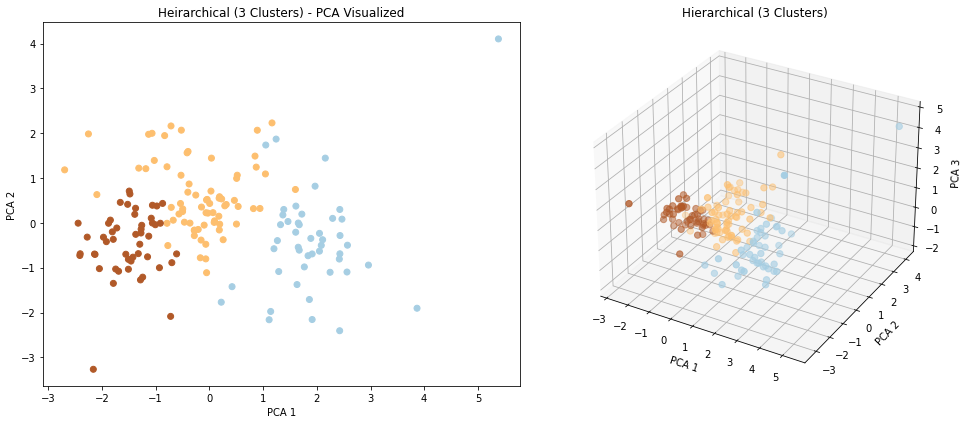

In [32]:


fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(pca_result[:, 0], pca_result[:, 1], c=data['agglo_cluster'], cmap='Paired')
ax1.set_title("Heirarchical (3 Clusters) - PCA Visualized")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")

# 3D plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(pca_result[:, 0], pca_result[:, 1],pca_result[:, 2], c=data['agglo_cluster'], cmap='Paired', s=40)
ax2.set_title("Hierarchical (3 Clusters)")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_zlabel("PCA 3")

plt.tight_layout()
plt.show()

The clustering above may not be further apart but they do appear somewhat separated. However, Kmeans seemed to perform better.

In [33]:

# Map cluster numbers to labels


# Create choropleth map
fig = px.choropleth(
    data_frame = data,
    locationmode = 'country names',
    locations = 'country',
    title = 'Needed Help Per Country (World)',
    color = 'Help_Status2',
    color_discrete_map={
        'Help Needed': 'Red',
        'Might Need Help': 'Yellow',
        'No Help Needed': 'Green'
    }
)

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    legend_title_text='Labels',
    legend_title_side='top',
    title_pad_l=260,
    title_y=0.86
)

fig.show()

### Evaluating Clustering Performance

The map provides a clear visual distinction and appears to effectively categorize countries in a way that aligns with the general classification of first, second, and third world nations. However, looking at the clustering evaluation scores, we can observe the following:

- The **Davies-Bouldin Index (DBI)** is not close to 0, indicating poor separation and compactness of clusters.
- The **Silhouette Coefficient (SC)** is closer to 0 than to 1, suggesting that the clusters overlap and are not well-defined.
- The **Calinski-Harabasz Index (CHI)** is not very high — for high-quality clustering, we would typically expect CHI values in the hundreds.

Overall, these scores (DBI, SC, and CHI) suggest that our current clustering is not very effective. Therefore, let us explore an alternative clustering method to see if we can achieve better-defined groups.

### DBSCAN – Density-Based Spatial Clustering of Applications with Noise

Although DBSCAN wasn't part of our initial clustering approach, we’ll apply it as a third method to explore whether it can yield improved clustering results.

DBSCAN offers a unique advantage over methods like K-Means—it can identify clusters of arbitrary shape and is robust to outliers. It relies on two key parameters:

- **`eps` (epsilon)**: The maximum distance between two samples for them to be considered as part of the same neighborhood.
- **`min_samples`**: The minimum number of samples required to form a dense region (i.e., a core point). Higher values result in denser clusters.

Referring back to the dendrograms we plotted earlier, an **epsilon value of 0.5** (based on Euclidean distance) seems like a reasonable starting point. We will use the default value of **5** for `min_samples`.

This method may provide better-defined clusters or help uncover structure missed by K-Means or Hierarchical Clustering.

In [34]:

d_model = DBSCAN(eps=0.5, min_samples=3)
y_d = d_model.fit_predict(pca_result)



d_silhouette = silhouette_score(pca_result, y_d)
d_dbs = davies_bouldin_score(pca_result, y_d)
d_chs = calinski_harabasz_score(pca_result, y_d)

print(f"DBSCAN Silhouette Coefficient: {d_silhouette:.3f}")
print(f"DBSCAN Calinski-Harabasz Index: {d_chs:.2f}")
print(f"DBSCAN Davies-Bouldin Index: {d_dbs:.3f}")

DBSCAN Silhouette Coefficient: 0.089
DBSCAN Calinski-Harabasz Index: 16.59
DBSCAN Davies-Bouldin Index: 1.889


Unfortunately, DBSCAN does not perform any better than the other two models (it performs worse). We will not iterate on it further as it will not improve enough to outperform K-Means or Agglomerative clustering.

## 5. Conclusion

#### 1. **K-Means Clustering**
- Applied on PCA-reduced data.
- Optimal number of clusters selected: **k = 3**
- Results:
  - SC = **0.305**
  - CHI = 84.7
  - DBI = 1.15
- Chosen for final classification due to strong performance and good interpretability.
- Clusters were visualized in PCA plots and geographical maps.

#### 2. **Agglomerative (Hierarchical) Clustering**
- Tried various linkage-affinity combinations:
  - `ward` with `euclidean`
  - `complete` with `euclidean` and `cosine`
- Best result (2 clusters) had SC = **0.665**, but lacked 3-level differentiation.
- Final choice for 3-cluster comparison:
  - `ward` linkage with 3 clusters: SC = **0.278**, CHI = 77.2, DBI = 1.23
- Mapped and analyzed similarly to K-Means.

#### 3. **DBSCAN**
- Parameters: `eps=0.5`, `min_samples=3`
- Resulted in weak cluster separation:
  - SC = **0.089**
  - CHI = 16.59
  - DBI = 1.889
- Clusters were poorly formed; hence DBSCAN was discarded from final selection.

---

### Final Model Selection

| Model              | SC (↑)   | CHI (↑)  | DBI (↓) | Interpretability |
|--------------------|----------|----------|----------|-------------------|
| K-Means (k=3)      | 0.305    | 84.7     | 1.15     | ✅ High            |
| Agglo (Ward, k=3)  | 0.278    | 77.2     | 1.23     | ✅ Medium          |
| DBSCAN             | 0.089    | 16.6     | 1.89     | ❌ Low             |

- **K-Means** was selected as the final clustering algorithm due to its performance and intuitive 3-cluster separation.
- The clusters were interpreted using child mortality and GDP per capita and mapped globally to provide actionable socio-economic insights.

### Final List of Countries Needing the Most Help

After applying both **K-Means Clustering** and **Hierarchical Clustering**, we identified a group of countries that consistently fall into the "Help Needed" category based on key indicators such as **high child mortality**, **low income**, and **low GDP per capita**.

To finalize our selection, we sorted the countries in descending order of **child mortality** and ascending order of **income** and **GDP per capita**, as these metrics are strong indicators of socio-economic need.

Below is a snapshot of the top countries from the KMeans results:

In [35]:
data[data['Help_Status1']=='Help Needed'].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()


country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   

     inflation  life_expec  total_fer  gdpp  k_cluster Help_Status1  \
66        5.45        32.1       3.33   662          0  Help Needed   
132      17.20        55.0       5.20   399          0  Help Needed   
32        6.39        56.5       6.59   897          0  Help Needed   
31        2.01        47.5       5.21   446          0  Help Needed   
97        4.37        59.5       6.55   708          0  Help Needed   

     agglo_cluster Help_Status2  
66               0  Help Needed  
132              0  Help Needed  
32               0  Help Needed  
31               0  Help Needed  
97               0  Help Needed

Hierarchical Result:

In [36]:
data[data['Help_Status2']=='Help Needed'].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()


country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   

     inflation  life_expec  total_fer  gdpp  k_cluster Help_Status1  \
66        5.45        32.1       3.33   662          0  Help Needed   
132      17.20        55.0       5.20   399          0  Help Needed   
32        6.39        56.5       6.59   897          0  Help Needed   
31        2.01        47.5       5.21   446          0  Help Needed   
97        4.37        59.5       6.55   708          0  Help Needed   

     agglo_cluster Help_Status2  
66               0  Help Needed  
132              0  Help Needed  
32               0  Help Needed  
31               0  Help Needed  
97               0  Help Needed

They give same results.